## II. Model creation and Algorithm Testing

In this notebook, I shall used prepared data from the previous notebook to create and train a model.

To create the model, I shall check for collinearity (and remove redundant columns) and apply Smote to deal with data imbalance (on the label). 

The model will be trained using the following algorithms: 
    * Simple Linear Regression
    * Linear Regression (l1 penalty)
    * Linear Regression (l2 penalty)
    * Linear Discriminant Analysis 
    * Gaussian Naive Bayes
    * Decision Tree Classifier
    * Random Forest Classifier
    * SVM classifier
    * KNN classifier

First, the algorithms will be tested without tunning its parameters

Secondly, I will find the best paramaters for some of the above algorithms and re-train the model to see if there was an improvement. 

Then, I will compare resulst and select the best one.

Conclusion and cross validation

### 1 Importing libraries

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from glob import glob
from numpy.random import RandomState


%matplotlib inline
%matplotlib inline

### 2. Import datasets 

In [2]:
# Merge the two datasets
df=pd.read_csv('dfprepared.csv')
df.shape

(30541, 79)

In [3]:
rs = RandomState(130917)

### 3. Model creation, data balancing and collinearity

#### 3.1 Model Creation

In [4]:
# create the model
X = df.loc[:, df.columns != 'Income']
y = df['Income']


In [5]:
from sklearn.model_selection import train_test_split
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 3.3 Smote for data imbalance

In [6]:
train_input = X_train
train_output = y_train

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Original dataset shape Counter({0: 16678, 1: 4700})
New dataset shape Counter({0: 16678, 1: 16678})


#### 3.2 Checking for collinearity and feature removal

In [8]:
#Colinearity
import numpy as np
import pandas as pd
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X_train, thresh=5.0):
    variables = [X_train.columns[i] for i in range(X_train.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X_train[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X_train[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X_train[[i for i in variables]]

X = X_train # Selecting your data

X_train = calculate_vif_(X_train,5) # Actually running the function

78


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:   21.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:09:58 2019 dropping '21-30' at index: 3
77


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  77 out of  77 | elapsed:   15.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:10:14 2019 dropping ' Federal-gov' at index: 7
76


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  76 out of  76 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:10:29 2019 dropping ' Unknown' at index: 12
75


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:10:44 2019 dropping ' Unknown.1' at index: 12
74


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:10:58 2019 dropping ' 10th' at index: 13
73


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:11:12 2019 dropping ' 1st-4th' at index: 15
72


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:11:27 2019 dropping ' Assoc-acdm' at index: 18
71


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:11:41 2019 dropping ' Assoc-voc' at index: 18
70


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   13.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:11:54 2019 dropping '10-12' at index: 25
69


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:12:06 2019 dropping ' Divorced' at index: 28
68


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:12:19 2019 dropping ' Adm-clerical' at index: 34
67


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:   12.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:12:31 2019 dropping ' Husband' at index: 49
66


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:12:44 2019 dropping ' African-American' at index: 54
65


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:12:58 2019 dropping ' Female' at index: 58
64


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   14.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:13:12 2019 dropping ' Unknown.2' at index: 47
63


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:13:24 2019 dropping '38-49' at index: 59
62


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:13:34 2019 dropping ' Married-civ-spouse' at index: 29
61


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:13:43 2019 dropping ' Private' at index: 8
60


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:13:52 2019 dropping 'above 13' at index: 25
59


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:14:00 2019 dropping ' White' at index: 53
58


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:14:09 2019 dropping 'less 5' at index: 25
57


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:14:17 2019 dropping 'CapitalLoss' at index: 2
56


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fri May 24 11:14:28 2019 dropping ' Male' at index: 51
55


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s


Remaining variables:
[['fnlwgt', 'CapitalGain', '31-40', '41-50', 'abvove 70', 'below 20', ' Local-gov', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' WP-NW', ' 11th', ' 12th', ' 5th-6th', ' 7th-8th', ' 9th', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college', '6-9', ' Married-AF-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' Unknown.3', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Other', '19-37', '50-64', 'above 65', 'less 18']]


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    7.9s finished


78-55 = 23 features have been pruned!

So the new data frame will be composed of the remaining variables above displayed

In [9]:
# So new data frame will be composed of columns above + label (Income)
df=df[['Income','fnlwgt', 'CapitalGain', '31-40', '41-50', 'abvove 70', 'below 20', ' Local-gov', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' WP-NW', ' 11th', ' 12th', ' 5th-6th', ' 7th-8th', ' 9th', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college', '6-9', ' Married-AF-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving', ' Unknown.3', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Other', '19-37', '50-64', 'above 65', 'less 18']]

In [10]:
df.shape

(30541, 56)

### 5. Algorithm Testing 

#### 5.1 Baseline 
In this part, we shall train the model with several algorithms without tunning  algorithm hyperparameters

**Simple Linear Regression**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X_train, Y_train)

logregprediction=logreg.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logregprediction,y_test))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.807814034704791


**Linear Regression classifier (l1) penalty**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg1 = LogisticRegression(fit_intercept=True, penalty='l1')
logreg1.fit(X_train, Y_train)

logregprediction=logreg1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logregprediction,y_test))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8080323038306232


**Linear Regression classifier (l2) penalty**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg2 = LogisticRegression(fit_intercept=True, penalty='l2')
logreg2.fit(X_train, Y_train)

logreg2prediction=logreg2.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logreg2prediction,y_test))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.807814034704791


**Linear Discriminant Analysis** 

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda.fit(X_train, Y_train)

lda_prediction=lda.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(lda_prediction,y_test))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.7942813489031977


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


**Gaussian Naive Bayes** 

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.fit(X_train, Y_train)

gnbprediction=gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(gnbprediction,y_test))

Accuracy: 0.5927098111972061


**Decision Tree Classifier**

In [19]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtc= DecisionTreeClassifier(random_state=1234)
#learning
dtc.fit(X_train,Y_train)
#Prediction
dtcprediction=dtc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(dtcprediction,y_test))


Accuracy of Decision Tree Classifier: 0.8054130743206374


**Random Forest Classifier**

In [20]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfc=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
rfc.fit(X_train,Y_train)
#Prediction
rfcprediction=rfc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of Random Forest Classifier:",metrics.accuracy_score(rfcprediction,y_test))


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest Classifier: 0.8266943140892721


**SVM Classifier**

In [82]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn import svm
#making the instance
svc = svm.SVC(random_state=123)
#learning
svc.fit(X_train,Y_train)
#Prediction
svcprediction=svc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of SVM classifier:",metrics.accuracy_score(svcprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(svcprediction,y_test))


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM classifier: 0.8008294226781622
Confusion Matrix:
 [[5569  306]
 [1519 1769]]


**K-NearestNeighbours Classifier**

In [83]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knn = KNeighborsClassifier()
#learning
knn.fit(X_train,Y_train)
#Prediction
knnprediction=knn.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of KNN classifier:",metrics.accuracy_score(knnprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(knnprediction,y_test))


Accuracy of KNN classifier: 0.7650332860416894
Confusion Matrix:
 [[5376  441]
 [1712 1634]]


#### 5.2 Hyperparameter tunning
In this second part, I shall train the model with some of the above algorithms, but this time each algorithm will be trained with its best hyperparameters

**Decision Tree Classifier Hyperparameter tunned** 

In [23]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtcmodel= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(dtcmodel, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
DTCimproved_prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of DTC improved:",metrics.accuracy_score(DTCimproved_prediction,y_test))




/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 13, 'random_state': 123}
Accuracy of DTC improved: 0.8058496125723017


**Random Forest Classifier Hyperparameter tunned** 

In [84]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfcmodel=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(rfcmodel, param_grid=params, n_jobs=-1)
#learning
model2.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
RFCimproved_prediction=model2.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of RFC improved:",metrics.accuracy_score(RFCimproved_prediction,y_test))



/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy of RFC improved: 0.8336789261159009


**SVM Classifier Hyperparameter tunned** 

In [85]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svmmodel=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model3 = GridSearchCV(svmmodel, param_grid=params, n_jobs=-1)
#Learning
model3.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model3.best_params_)
#Prediction
SVMimproved_prediction=model3.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy SVMimproved:",metrics.accuracy_score(SVMimproved_prediction,y_test))


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best Hyper Parameters:
 {'C': 12, 'kernel': 'rbf'}
Accuracy SVMimproved: 0.8109789370293572


**KNN Classifier Hyperparameter tunned** 

In [26]:
importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knnmodel = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model4 = GridSearchCV(knnmodel, param_grid=params, n_jobs=1)
#Learning
model4.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model4.best_params_)
#Prediction
KNNimproved_prediction=model4.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of KNN classifier improved:",metrics.accuracy_score(KNNimproved_prediction,y_test))
#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(KNNimproved_prediction,y_test))


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
Accuracy of KNN classifier improved: 0.7806395285386882
Confusion Matrix:
 [[5590  494]
 [1516 1563]]


We can see the accuracy of all models has been improved after tunning their hyperparameters.

## 7. Conclusion and Cross Validation

Random Forest Classifier with its hyperparmaters tuned is the best model we obtained. 

These are the metrics:

- Accuraccy 83.36% 
- Cross Validdation score 88.95 
- Dev set score of 89.51%. 

In [93]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score for SVM improved: {:.2%}".format(np.mean(cross_val_score(model2, X_train, Y_train, cv=10))))

model2.fit(X_train, Y_train)
print("Dev Set score SVM improved: {:.2%}".format(model2.score(X_dev, Y_dev)))

/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specif

Cross Validation Score for SVM improved: 88.95%


/anaconda3/envs/machine-learning/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Dev Set score SVM improved: 89.51%


In [91]:
import sklearn.metrics as sklm

labels = np.array(df['Income'])
probabilities = model2.predict_proba(X_test)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6253               835
Actual negative       689              1386

Accuracy  0.83
 
           Positive      Negative
Num case     7088          2075
Precision    0.90          0.62
Recall       0.88          0.67
F1           0.89          0.65


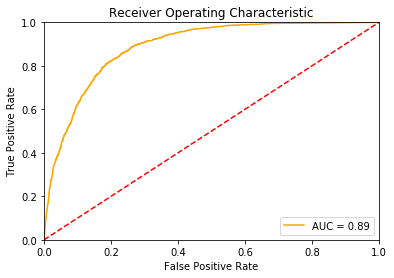

In [92]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  